# Analysis of Executive Orders from 1994 to Present

Start with necessary imports

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
EO = pd.read_csv("executive_orders.csv")
EO.head()

,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number
0,87 FR 13625,2022-05232,13626,https://www.federalregister.gov/documents/2022...,https://www.govinfo.gov/content/pkg/FR-2022-03...,Presidential Document,Executive Order,03/10/2022,2022-03-08,13625,Prohibiting Certain Imports and New Investment...,"See: EO 14024, April 15, 2021; EO 14039, Augus...",14066
1,82 FR 34383,2017-15680,34385,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-07...,Presidential Document,Executive Order,07/25/2017,2017-07-19,34383,Establishing a Presidential Advisory Council o...,"Revoked by: EO 13811, September 29, 2017",13805
2,87 FR 14143,2022-05471,14152,https://www.federalregister.gov/documents/2022...,https://www.govinfo.gov/content/pkg/FR-2022-03...,Presidential Document,Executive Order,03/14/2022,2022-03-09,14143,Ensuring Responsible Development of Digital As...,"Revoked by: EO 14178, January 23, 2025",14067
3,82 FR 28747,2017-13458,28748,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-06...,Presidential Document,Executive Order,06/26/2017,2017-06-21,28747,Amending Executive Order 13597,"Amends: EO 13597, January 19, 2012",13802
4,82 FR 28229,2017-13012,28232,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-06...,Presidential Document,Executive Order,06/20/2017,2017-06-15,28229,Expanding Apprenticeships in America,"Revoked by: EO 14016, February 17, 2021",13801


We will now perform necessary preprocessing of the data. The code for this can be found in processing.py, a script imported above. We will start be verifying all the rows by checking their type and subtype. We will then parse a few of the columns to make plotting and analysis easier later on.

In [3]:
import EO_processing.verify as verify
import EO_processing.additions as add

In [10]:
count_type_incorrect = verify.verify_type(EO, 'Presidential Document')
if count_type_incorrect > 0:
    EO_type_verified = verify.fix_type(EO, 'Presidential Document')
    print('Dataframe modified to ensure type consistency.')
else:
    EO_type_verified = EO
    print('Types are consistent.')
    
count_subtype_incorrect = verify.verify_subtype(EO_type_verified, 'Executive Order') 
if count_subtype_incorrect > 0:
    EO_subtype_verified = verify.fix_subtype(EO_type_verified, 'Executive Order')
    print('Dataframe modified to ensure subtype consistency.')
else:
    EO_subtype_verified = EO_type_verified
    print('Subtypes are consistent.')
EO_with_years = add.add_years(EO_subtype_verified, 'signing_date')
EO_with_months = add.add_months(EO_with_years, 'signing_date')

Types are consistent.
Subtypes are consistent.


# Frequency of Executive Orders 

In [17]:
year_data = []
month_data = []
for _, row in EO_with_months.iterrows():
    year_data.append(int(row['year']))
    month_data.append(int(row['month']))
month_map = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
month_data_name =[month_map[i] for i in month_data]
years = np.array(year_data)
months = np.array(month_data)
months_names = np.array(month_data_name)

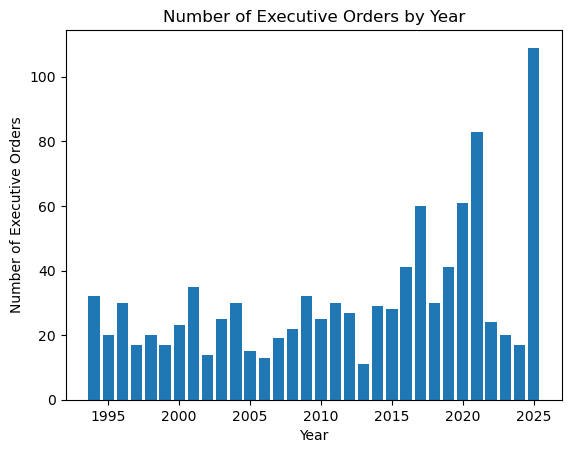

In [22]:
vals, years_plot1 = np.unique(years, return_counts=True)
plt.bar(vals, years_plot1)
plt.xlabel("Year")
plt.ylabel("Number of Executive Orders")
plt.title("Number of Executive Orders by Year")
plt.show();

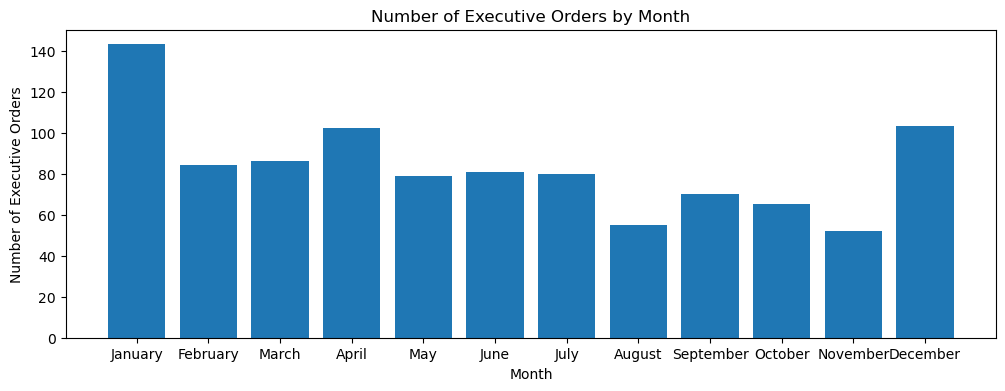

In [29]:
month_order = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
vals2, months_plot2 = np.unique(months_names, return_counts=True)
indices = np.argsort([month_order[m] for m in vals2])
vals2 = vals2[indices]
months_plot2 = months_plot2[indices]
plt.figure(figsize=(12, 4))
plt.bar(vals2, months_plot2)
plt.xlabel("Month")
plt.ylabel("Number of Executive Orders")
plt.title("Number of Executive Orders by Month")
plt.show();

# Changes in Publication Delay

In [40]:
publication_EO = EO_with_months
publication_EO['pub_date_cleaned'] =  pd.to_datetime(publication_EO["publication_date"], format="%m/%d/%Y")
publication_EO['signed_date_cleaned'] =  pd.to_datetime(publication_EO["signing_date"])
publication_EO["days_diff"] = (publication_EO["pub_date_cleaned"] - publication_EO["signed_date_cleaned"]).dt.days

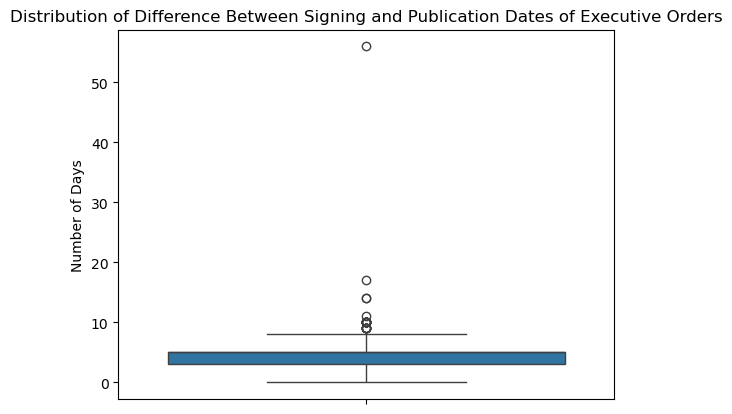

In [45]:
sns.boxplot(y=publication_EO['days_diff'])
plt.ylabel("Number of Days")
plt.title("Distribution of Difference Between Signing and Publication Dates of Executive Orders")
plt.show()

There is obviously a major outlier, so we will first replot this and exclude that EO. Then, we will examine that entry.

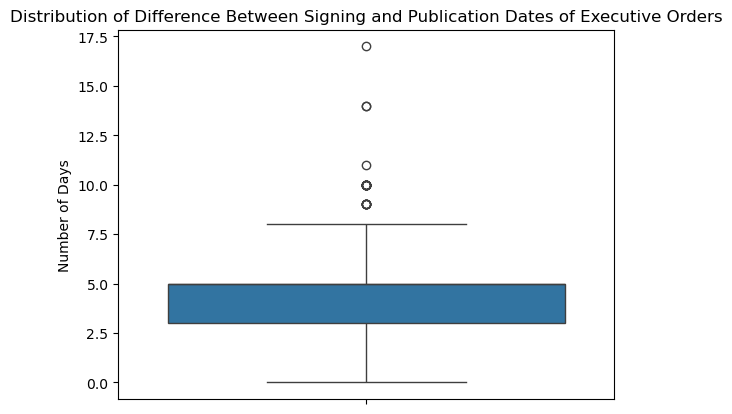

In [48]:
sns.boxplot(y=publication_EO.loc[publication_EO['days_diff'] < 50, 'days_diff'])
plt.ylabel("Number of Days")
plt.title("Distribution of Difference Between Signing and Publication Dates of Executive Orders")
plt.show()

In [49]:
max_delay = publication_EO['days_diff'].idxmax()
max_delay_row = publication_EO.loc[max_delay]
max_delay_row

citation                                                        85 FR 59171
document_number                                                  2020-20887
end_page                                                              59172
html_url                  https://www.federalregister.gov/documents/2020...
pdf_url                   https://www.govinfo.gov/content/pkg/FR-2020-09...
type                                                  Presidential Document
subtype                                                     Executive Order
publication_date                                                 09/18/2020
signing_date                                                     2020-07-24
start_page                                                            59171
title                         Lowering Drug Prices by Putting America First
disposition_notes                                                       NaN
executive_order_number                                                13947
year        

Looking at this entry gives us some interesting information about the dataset. First, both the links appear to be deprecated, so we will have to use the web to learn more about this EO. Going to the new website link for this EO ([__click on this for link__](https://www.federalregister.gov/documents/2020/09/23/2020-21129/lowering-drug-prices-by-putting-america-first)) and going to the 'Executive Order Details' section shows us that the signing date is actually 09/13/2020, which is 5 days from the given publication date. Looking at our boxplot above, we can see that 5 is not an outlier while the one given above (07/24/2020 corresponding to 50+) is. This suggests that there may be some data integrity issues in our csv file.

In [51]:
#TODO: add word frequency analysis to notebook

## Language Model Experiment on Executive Order Titles

To explore whether a small pretrained language model can adapt to the stylistic conventions of U.S. executive order titles, we fine-tuned a causal language model on historical EO titles. The objective of this experiment is exploratory and qualitative, focusing on stylistic adaptation rather than predictive performance. All analysis were done in the LLM.ipynb file and results were saved in "outputs/llm_title_outputs.csv". 


In [18]:
import pandas as pd
llm_title_result = pd.read_csv("outputs/llm_title_outputs.csv")
for i, row in llm_title_result.iterrows():
    print(f"=============  {i+1}th prompt: \"{row['prompt']}\"  ==============\n")
    print(f"before-tuning: {row['before']}\n")
    print(f"after-tuning: {row['after']}\n")


=============  1th prompt: "Executive Order on "  ==============

before-tuning: Executive Order on ix-8-9.

after-tuning: Executive Order on ixenable Employment, Economic Performance and Support for the American Indian and Central American Indian Communities, and

=============  2th prompt: "Executive Order on Protecting "  ==============

before-tuning: Executive Order on Protecting -------------------------

after-tuning: Executive Order on Protecting ills and Jobs From Terrorist, Terrorist, and Terrorist Extremism Through Government-owned and

=============  3th prompt: "Establishing the "  ==============

before-tuning: Establishing the vernacular is a process that allows us to incorporate the same set of concepts, values, concepts,

after-tuning: Establishing the étente Agreement on Civil Rights and Equal Opportunity and Equality in the United States, and Supporting the Initiative

=============  4th prompt: "Amending Executive Order "  ==============

before-tuning: Amending Exe

Comparing the model outputs before and after fine-tuning reveals a noticeable shift toward more formal, EO-like phrasing after training. Post–fine-tuning outputs more frequently adopt administrative constructions such as “Establishing…”, “Amending Executive Order…”, and references to executive order numbers or effective dates. While some artifacts remain, the overall structure and tone of the generated titles better reflect the conventions of real executive order titles.


# Author Contributions

Aniket Kamat: I performed the data analysis in main.ipynb, wrote most of the functions in EO_processing, and worked on a few of the reproducibility features. This includes the myst site, the Binder deployment, and the licensing.

Brycen Manners: I performed the data analysis in word-analysis.ipynb, created the environment.yml, and created the Makefile.

Soohyun Kim: I performed data analysis in LLM.ipynb, updated environment.yml and main.ipynb, and helped polish overall structure of project. 